<h1><center>Tensorflow 7</center></h1>

<h1><center>Regression</center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit_psspl/environments/

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([-0.80298974,  0.26664631, -0.1417871 , ..., -1.09926019,
       -0.35946154, -0.87845597])

In [5]:
print(x_data,"\n","\n",noise)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01] 
 
 [-0.80298974  0.26664631 -0.1417871  ... -1.09926019 -0.35946154
 -0.87845597]


In [6]:
# y =mx+c , c= 5

y_true = (0.5 * x_data ) + 5 + noise

In [7]:
x_df = pd.DataFrame(data = x_data, columns=["x_data"])

In [8]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [9]:
x_df.head()

,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
con = pd.concat([x_df,y_df],axis=1)

In [11]:
con.head()

,x_data,Y
0,0.00000,4.197010
1,0.00001,5.266651
2,0.00002,4.858223
3,0.00003,3.935289
4,0.00004,4.282539


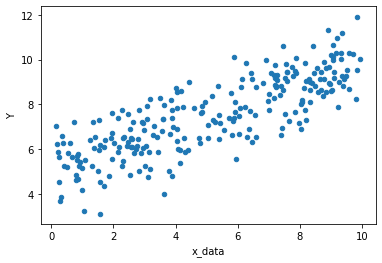

In [12]:
con.sample(n=250).plot(kind = 'scatter', x= 'x_data', y ='Y')

In [13]:
# we succesfully created dataset

In [14]:
# now we have to create best fit line for dataset

In [15]:
batch_size = 8

In [16]:
m = tf.Variable(0.5)
c = tf.Variable(1.0)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [18]:
#model
y_model = m*xph +c

In [19]:
#cost function
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_c = sess.run([m,c])

In [23]:
model_m

0.47469822

In [24]:
model_c

5.038906

In [25]:
y_hat = x_data * model_m + model_c

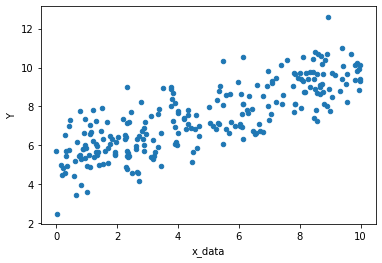

In [26]:
con.sample(250).plot(kind="scatter",x = "x_data", y ='Y')

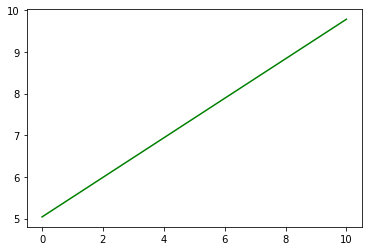

In [27]:
plt.plot(x_data,y_hat,"g")

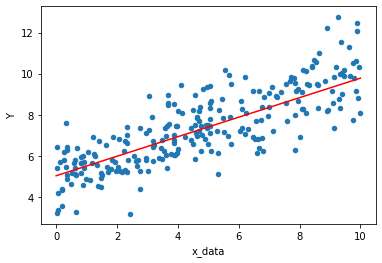

In [28]:
con.sample(250).plot(kind="scatter",x = "x_data", y ='Y')
plt.plot(x_data,y_hat,"r")

In [29]:
# Estimator api
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp09bndutb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2c2c238048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
# Train test split
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=0)

In [33]:
print(x_train.shape)
print(x_eval.shape)

(700000,)
(300000,)


In [34]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None, shuffle=True)

In [35]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [36]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [37]:
estimator.train(input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp09bndutb/model.ckpt.
INFO:tensorflow:loss = 241.00554, step = 1
INFO:tensorflow:global_step/sec: 975.744
INFO:tensorflow:loss = 3.034031, step = 101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1058.69
INFO:tensorflow:loss = 6.9883404, step = 201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1265.38
INFO:tensorflow:loss = 2.1492374, step = 301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1417.56
INFO:tensorflo